In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import sklearn
import seaborn as sns

In [5]:
data=pd.read_csv('iris.data')

In [6]:
data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
data.keys()

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [8]:
data.columns=['sl','sw','pw','pl','output']

In [9]:
data.head()

,sl,sw,pw,pl,output
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [10]:
data['output'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
data.isnull().values.any()

False

In [12]:
data.isnull().sum()

sl        0
sw        0
pw        0
pl        0
output    0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl      149 non-null    float64
 1   sw      149 non-null    float64
 2   pw      149 non-null    float64
 3   pl      149 non-null    float64
 4   output  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [14]:
data['output'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: output, dtype: int64

C:\Users\shivam\anaconda5\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='output', ylabel='count'>

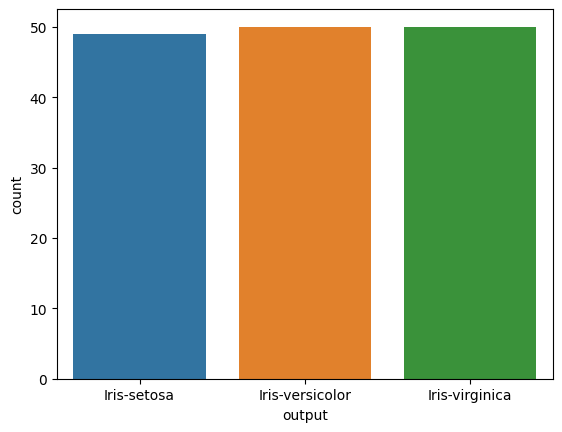

In [15]:
sns.countplot(data['output'])

C:\Users\shivam\anaconda5\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


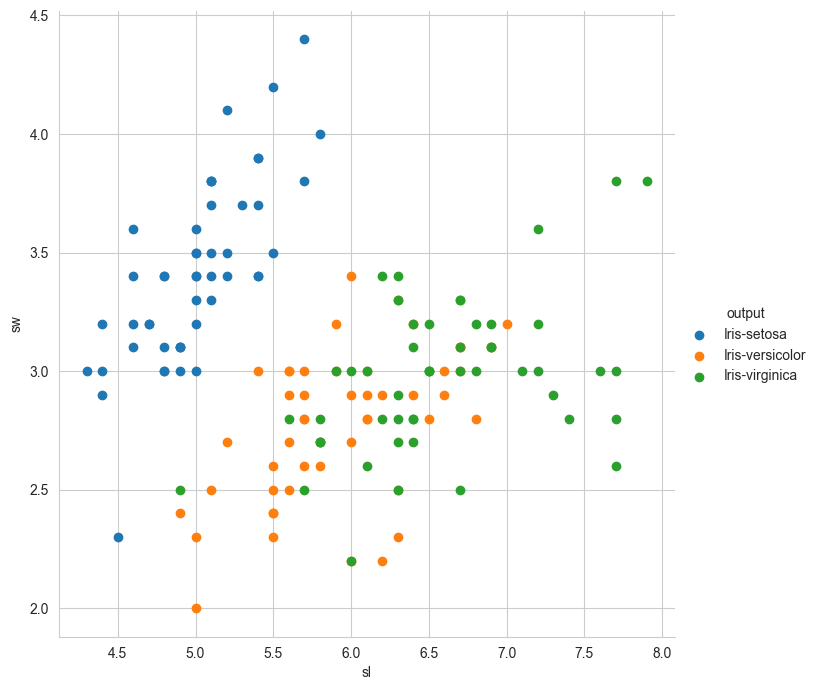

In [16]:
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='output', size=7).map(plt.scatter,'sl','sw').add_legend()


C:\Users\shivam\anaconda5\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


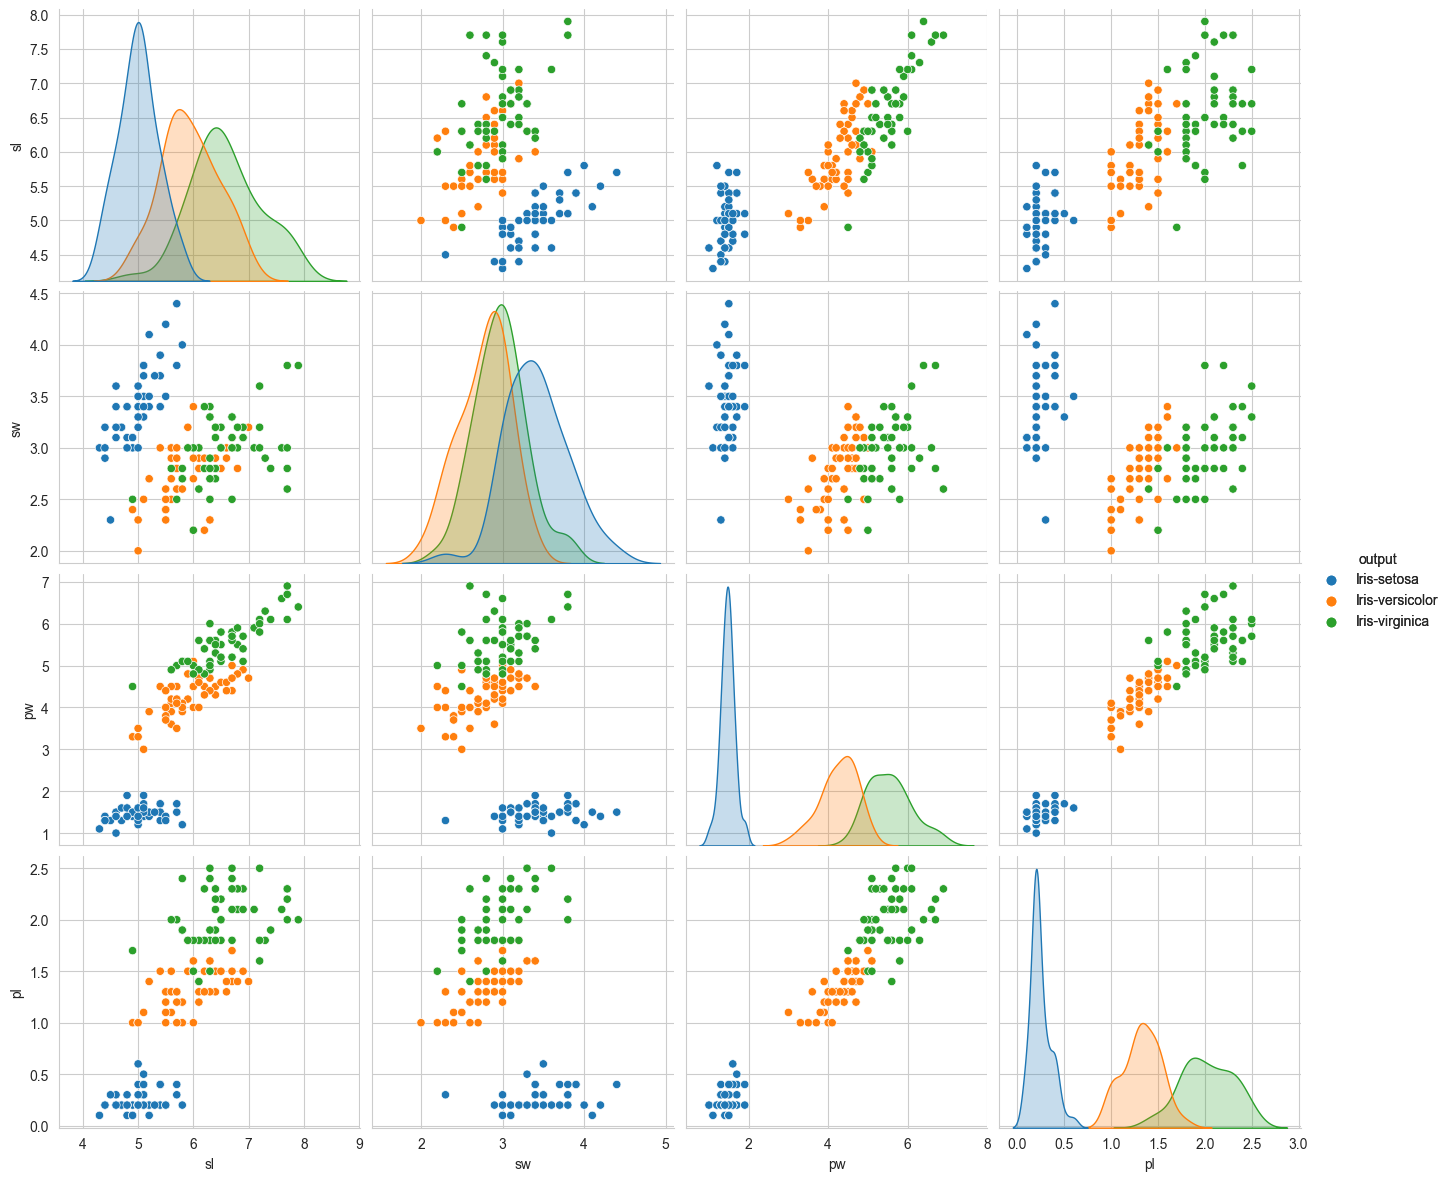

In [18]:
sns.pairplot(data, hue='output',size=3).add_legend()

In [19]:
#preprocessing
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoder = LabelEncoder()

In [21]:
data['output']=label_encoder.fit_transform(data['output'])

In [22]:
data.head()

,sl,sw,pw,pl,output
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [23]:
data.dtypes

sl        float64
sw        float64
pw        float64
pl        float64
output      int32
dtype: object

In [24]:
x=data.drop(['output'],axis=1)
y=data['output']

In [25]:
x.shape

(149, 4)

In [26]:
y.shape

(149,)

In [27]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [28]:
from sklearn.linear_model import LogisticRegression

In [57]:
#fit data
log=LogisticRegression(random_state=0)
log.fit(x_train,y_train)


In [30]:
y_pred=log.predict(x_test)
print(y_pred)

[2 0 2 1 1 2 0 0 1 2 0 2 2 1 1 1 2 0 2 1 1 0 1 0 2 2 1 0 2 1]


In [31]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 8,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 11]], dtype=int64)

In [32]:
#accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [34]:
pip install lazypredict

     ---------------------------------------- 1.0/1.0 MB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [35]:
import lazypredict
from lazypredict.Supervised import LazyClassifier


In [37]:

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:04<00:00,  7.14it/s]


In [38]:
print(models)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LinearDiscriminantAnalysis         1.00               1.00    None      1.00   
QuadraticDiscriminantAnalysis      1.00               1.00    None      1.00   
LGBMClassifier                     0.97               0.97    None      0.97   
KNeighborsClassifier               0.97               0.97    None      0.97   
RandomForestClassifier             0.97               0.97    None      0.97   
LogisticRegression                 0.97               0.97    None      0.97   
BaggingClassifier                  0.97               0.97    None      0.97   
LabelSpreading                     0.97               0.97    None      0.97   
LabelPropagation                   0.97               0.97    None      0.97   
GaussianNB                         0.97               0.97    None      0.97   
ExtraTreesClassifier               0.97 

In [39]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearDiscriminantAnalysis,1.00,1.00,None,1.00,0.53
QuadraticDiscriminantAnalysis,1.00,1.00,None,1.00,0.11
LGBMClassifier,0.97,0.97,None,0.97,0.25
KNeighborsClassifier,0.97,0.97,None,0.97,0.13
RandomForestClassifier,0.97,0.97,None,0.97,0.27
LogisticRegression,0.97,0.97,None,0.97,0.05
BaggingClassifier,0.97,0.97,None,0.97,0.12
LabelSpreading,0.97,0.97,None,0.97,0.02
LabelPropagation,0.97,0.97,None,0.97,0.19


In [56]:
import pickle

In [64]:
pickle.dump(log, open('model_save','wb'))

In [66]:
model=pickle.load(open('model_save','rb'))

In [70]:
model.predict(x_test)

array([2, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 0,
       1, 0, 2, 2, 1, 0, 2, 1])